# 다층 퍼셉트론 신경망 모델 
* 이진 분류 문제

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(5)     # 랜덤시드 고정시키기 

## 1. 데이터 준비하기 
#### 1.1 데이터 
* 인스턴스 수 : 768개
* 속성 수 : 8가지
* 클래스 수 : 2가지
    
#### 1.2 8가지 속성(1번~8번)과 결과(9번)의 상세 내용은 다음과 같습니다.
* 임신 횟수
* 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
* 이완기 혈압 (mm Hg)
* 삼두근 피부 두겹 두께 (mm)
* 2 시간 혈청 인슐린 (mu U/ml)
* 체질량 지수
* 당뇨 직계 가족력
* 나이 (세)
* 5년 이내 당뇨병이 발병 여부

In [2]:
dataset = np.loadtxt("./pima-indians-diabetes.csv", delimiter=",")

## 2. 데이터셋 생성하기
* 데이터셋에는 속성값과 판정결과가 모두 포함되어 있기 때문에 입력(속성값 8개)와 출력(판정결과 1개) 변수로 분리합니다.

In [3]:
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

## 3. 모델 구성하기
속성이 8개이기 때문에 입력 뉴런을 8개이고, 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개입니다.

* 첫번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력합니다.
* 두번째 Dense 레이어는 은닉층으로 12개 뉴런을 입력받아 8개 뉴런을 출력합니다.
* 마지막 Dense 레이어는 출럭 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력합니다.

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


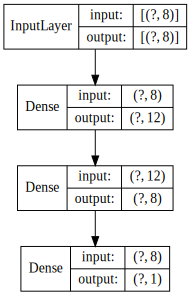

In [5]:
from IPython.display import SVG, display
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

%matplotlib inline

iv1_dot = model_to_dot(model, show_shapes=True, show_layer_names=False, dpi=70)   # 사이즈 변경하기 
plot_model(model, to_file='model.png')
display(SVG(iv1_dot.create(prog=['dot'], format='svg')))

## 4 모델 학습과정 설정하기
모델을 정의했다면 모델을 손실함수와 최적화 알고리즘을 적용한다.

* loss : 현재 가중치 세트를 평가하는 데 사용한 손실 함수 입니다. 이진 클래스 문제이므로 ‘binary_crossentropy’으로 지정합니다.
* optimizer : 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 ‘adam‘을 사용합니다.
* metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 ‘accuracy’으로 지정합니다.

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 5. 모델 학습시키기 
모델을 학습시키기 위해서 fit() 함수를 사용합니다.

* 첫번째 인자 : 입력 변수입니다. 8개의 속성 값을 담고 있는 X를 입력합니다.
* 두번째 인자 : 출력 변수 즉 라벨값입니다. 결과 값을 담고 았는 Y를 입력합니다.
* epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 1500번을 반복적으로 학습시켜 보겠습니다.
* batch_size : 가중치를 업데이트할 배치 크기를 의미하며, 64개로 지정했습니다.

In [7]:
hist = model.fit(x_train, y_train, epochs=1500, batch_size=64)

Train on 700 samples
Epoch 1/1500
700/700 [==============================] - 1s 834us/sample - loss: 33.9391 - accuracy: 0.6557
Epoch 2/1500
700/700 [==============================] - 0s 43us/sample - loss: 27.2344 - accuracy: 0.6557
Epoch 3/1500
700/700 [==============================] - 0s 43us/sample - loss: 20.8236 - accuracy: 0.6543
Epoch 4/1500
700/700 [==============================] - 0s 40us/sample - loss: 15.8058 - accuracy: 0.6357
Epoch 5/1500
700/700 [==============================] - 0s 41us/sample - loss: 14.0392 - accuracy: 0.5629
Epoch 6/1500
700/700 [==============================] - 0s 41us/sample - loss: 12.6184 - accuracy: 0.5514
Epoch 7/1500
700/700 [==============================] - 0s 48us/sample - loss: 11.0993 - accuracy: 0.5657
Epoch 8/1500
700/700 [==============================] - 0s 44us/sample - loss: 9.5834 - accuracy: 0.5657
Epoch 9/1500
700/700 [==============================] - 0s 44us/sample - loss: 8.1462 - accuracy: 0.5686
Epoch 10/1500
700/700 [===

700/700 [==============================] - 0s 36us/sample - loss: 0.6072 - accuracy: 0.6971
Epoch 79/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.6057 - accuracy: 0.6871
Epoch 80/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.6024 - accuracy: 0.6857
Epoch 81/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.6027 - accuracy: 0.6986
Epoch 82/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.6033 - accuracy: 0.6986
Epoch 83/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.6127 - accuracy: 0.6857
Epoch 84/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.6024 - accuracy: 0.6914
Epoch 85/1500
700/700 [==============================] - 0s 40us/sample - loss: 0.6003 - accuracy: 0.6914
Epoch 86/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.6174 - accuracy: 0.6986
Epoch 87/1500
700/700 [==============================] - 0s 

700/700 [==============================] - 0s 37us/sample - loss: 0.5206 - accuracy: 0.7443
Epoch 231/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.5163 - accuracy: 0.7529
Epoch 232/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.5277 - accuracy: 0.7429
Epoch 233/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.5071 - accuracy: 0.7571
Epoch 234/1500
700/700 [==============================] - 0s 37us/sample - loss: 0.5082 - accuracy: 0.7443
Epoch 235/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.5037 - accuracy: 0.7471
Epoch 236/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.5059 - accuracy: 0.7514
Epoch 237/1500
700/700 [==============================] - 0s 37us/sample - loss: 0.5120 - accuracy: 0.7471
Epoch 238/1500
700/700 [==============================] - 0s 37us/sample - loss: 0.5179 - accuracy: 0.7329
Epoch 239/1500
700/700 [============================

700/700 [==============================] - 0s 34us/sample - loss: 0.5028 - accuracy: 0.7571
Epoch 383/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4867 - accuracy: 0.7671
Epoch 384/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.5017 - accuracy: 0.7571
Epoch 385/1500
700/700 [==============================] - 0s 38us/sample - loss: 0.4998 - accuracy: 0.7586
Epoch 386/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4850 - accuracy: 0.7671
Epoch 387/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4960 - accuracy: 0.7643
Epoch 388/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4831 - accuracy: 0.7571
Epoch 389/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.5022 - accuracy: 0.7543
Epoch 390/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4866 - accuracy: 0.7686
Epoch 391/1500
700/700 [============================

700/700 [==============================] - 0s 37us/sample - loss: 0.4750 - accuracy: 0.7743
Epoch 535/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.5043 - accuracy: 0.7443
Epoch 536/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4764 - accuracy: 0.7557
Epoch 537/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4719 - accuracy: 0.7786
Epoch 538/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4661 - accuracy: 0.7757
Epoch 539/1500
700/700 [==============================] - 0s 38us/sample - loss: 0.4625 - accuracy: 0.7800
Epoch 540/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4707 - accuracy: 0.7714
Epoch 541/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4752 - accuracy: 0.7714
Epoch 542/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4708 - accuracy: 0.7686
Epoch 543/1500
700/700 [============================

700/700 [==============================] - 0s 33us/sample - loss: 0.4653 - accuracy: 0.7686
Epoch 687/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4711 - accuracy: 0.7686
Epoch 688/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4653 - accuracy: 0.7643
Epoch 689/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4596 - accuracy: 0.7714
Epoch 690/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4574 - accuracy: 0.7786
Epoch 691/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4654 - accuracy: 0.7829
Epoch 692/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4626 - accuracy: 0.7814
Epoch 693/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4551 - accuracy: 0.7857
Epoch 694/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4572 - accuracy: 0.7714
Epoch 695/1500
700/700 [============================

700/700 [==============================] - 0s 36us/sample - loss: 0.4594 - accuracy: 0.7829
Epoch 839/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4625 - accuracy: 0.7729
Epoch 840/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4656 - accuracy: 0.7643
Epoch 841/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4683 - accuracy: 0.7814
Epoch 842/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4527 - accuracy: 0.7929
Epoch 843/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4553 - accuracy: 0.7757
Epoch 844/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4505 - accuracy: 0.7857
Epoch 845/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4498 - accuracy: 0.7857
Epoch 846/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4521 - accuracy: 0.7871
Epoch 847/1500
700/700 [============================

700/700 [==============================] - 0s 36us/sample - loss: 0.4501 - accuracy: 0.8029
Epoch 991/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4529 - accuracy: 0.7886
Epoch 992/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4563 - accuracy: 0.7900
Epoch 993/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4496 - accuracy: 0.7843
Epoch 994/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4598 - accuracy: 0.7771
Epoch 995/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4630 - accuracy: 0.7743
Epoch 996/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4573 - accuracy: 0.7957
Epoch 997/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4694 - accuracy: 0.7729
Epoch 998/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4491 - accuracy: 0.7857
Epoch 999/1500
700/700 [============================

700/700 [==============================] - 0s 40us/sample - loss: 0.4447 - accuracy: 0.7843
Epoch 1067/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4468 - accuracy: 0.7843
Epoch 1068/1500
700/700 [==============================] - 0s 37us/sample - loss: 0.4561 - accuracy: 0.7743
Epoch 1069/1500
700/700 [==============================] - 0s 38us/sample - loss: 0.4656 - accuracy: 0.7771
Epoch 1070/1500
700/700 [==============================] - 0s 38us/sample - loss: 0.4557 - accuracy: 0.7857
Epoch 1071/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4586 - accuracy: 0.7814
Epoch 1072/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4453 - accuracy: 0.7814
Epoch 1073/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4466 - accuracy: 0.7843
Epoch 1074/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4694 - accuracy: 0.7714
Epoch 1075/1500
700/700 [===================

700/700 [==============================] - 0s 36us/sample - loss: 0.4459 - accuracy: 0.7800
Epoch 1143/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4438 - accuracy: 0.7871
Epoch 1144/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4487 - accuracy: 0.7771
Epoch 1145/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4448 - accuracy: 0.7800
Epoch 1146/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4557 - accuracy: 0.7843
Epoch 1147/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4430 - accuracy: 0.7843
Epoch 1148/1500
700/700 [==============================] - 0s 37us/sample - loss: 0.4466 - accuracy: 0.7871
Epoch 1149/1500
700/700 [==============================] - 0s 32us/sample - loss: 0.4536 - accuracy: 0.7743
Epoch 1150/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4640 - accuracy: 0.7800
Epoch 1151/1500
700/700 [===================

700/700 [==============================] - 0s 33us/sample - loss: 0.4403 - accuracy: 0.7829
Epoch 1294/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4378 - accuracy: 0.7886
Epoch 1295/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4580 - accuracy: 0.7829
Epoch 1296/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4513 - accuracy: 0.7771
Epoch 1297/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4405 - accuracy: 0.7914
Epoch 1298/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4600 - accuracy: 0.7743
Epoch 1299/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4506 - accuracy: 0.7871
Epoch 1300/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4451 - accuracy: 0.7814
Epoch 1301/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4708 - accuracy: 0.7786
Epoch 1302/1500
700/700 [===================

700/700 [==============================] - 0s 34us/sample - loss: 0.4371 - accuracy: 0.7943
Epoch 1370/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4407 - accuracy: 0.7886
Epoch 1371/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4460 - accuracy: 0.7814
Epoch 1372/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4480 - accuracy: 0.7814
Epoch 1373/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4426 - accuracy: 0.7914
Epoch 1374/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4427 - accuracy: 0.7900
Epoch 1375/1500
700/700 [==============================] - 0s 34us/sample - loss: 0.4410 - accuracy: 0.7943
Epoch 1376/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4391 - accuracy: 0.7900
Epoch 1377/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4519 - accuracy: 0.7843
Epoch 1378/1500
700/700 [===================

700/700 [==============================] - 0s 33us/sample - loss: 0.4411 - accuracy: 0.7814
Epoch 1446/1500
700/700 [==============================] - 0s 37us/sample - loss: 0.4390 - accuracy: 0.7914
Epoch 1447/1500
700/700 [==============================] - 0s 36us/sample - loss: 0.4419 - accuracy: 0.7886
Epoch 1448/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4436 - accuracy: 0.7886
Epoch 1449/1500
700/700 [==============================] - 0s 32us/sample - loss: 0.4443 - accuracy: 0.7771
Epoch 1450/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4517 - accuracy: 0.7857
Epoch 1451/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4421 - accuracy: 0.7886
Epoch 1452/1500
700/700 [==============================] - 0s 33us/sample - loss: 0.4389 - accuracy: 0.7886
Epoch 1453/1500
700/700 [==============================] - 0s 31us/sample - loss: 0.4435 - accuracy: 0.7743
Epoch 1454/1500
700/700 [===================

## 6. 학습과정 그래프로 확인
히스토리 객체 생성
* 매 에포크 마다의 훈련 손실값 (loss)
* 매 에포크 마다의 훈련 정확도 (acc)
* 에포크 마다의 검증 손실값 (val_loss)
* 에포크 마다의 검증 정확도 (val_acc)

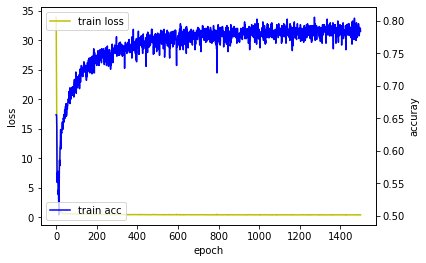

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 7. 모델 평가하기
시험셋으로 학습한 모델을 평가해봅니다.

In [9]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 851us/sample - loss: 0.5505 - accuracy: 0.7500
accuracy: 75.00%
